# Section 0: Load the dataset

In [2]:
import cv2
import os
import random
import numpy as np
from pathlib import Path
import urllib.request
import zipfile
import urllib
import hashlib
from tqdm import tqdm

from  matplotlib import pyplot as plt

random.seed(0)
np.random.seed(0)

In [ ]:
# Unmarked Image
# LTQ007_5_28
# LTQ008_1_30
# LTQ008_2_31
# LTQ008_3_32
# LTQ008_4_33
# LTQ008_6_35
# LTQ008_7_36
# LTQ009_4_41
# LTQ009_5_42
# LTQ017_11_86
# LTQ018_2_97
# LTQ019_9_113
# LTQ025_6_157

In [49]:
def load_data(data_dir):
    data_dir = Path(data_dir)
    if not data_dir.is_dir():
        raise ValueError(f"{data_dir} is not a directory.")

    # Read train
    train_dir = data_dir / "Original"
    train_label_path = data_dir / "eyelid_labels"
    train_label_path2 = data_dir / "meibomian_gland_labels"
    xs_train = []
    ys_train = []
    zs_train = []
    
    remove=["LTQ007_5_28",""]
    
    for images in os.listdir(train_dir):
        # check if the image ends with png or jpg or jpeg
        if (images.endswith(".png") or images.endswith(".jpg")\
            or images.endswith(".jpeg")):
            im_path = train_dir / images
            im_bgr = cv2.imread(str(im_path))
            im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
            assert im_rgb.dtype == np.uint8
            xs_train.append(im_rgb)
            
    for images in os.listdir(train_label_path):
        # check if the image ends with png or jpg or jpeg
        if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
            im_path = train_label_path / images
            im_bgr = cv2.imread(str(im_path))
            im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
            assert im_rgb.dtype == np.uint8
            ys_train.append(im_rgb)
            
    for images in os.listdir(train_label_path2):
        if (images.endswith(".png") or images.endswith(".jpg")\
        or images.endswith(".jpeg")):
            im_path = train_label_path2 / images
            im_bgr = cv2.imread(str(im_path))
            im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
            assert im_rgb.dtype == np.uint8
            zs_train.append(im_rgb)
        
        
    return xs_train, ys_train,zs_train

data_dir="Meibography"
xs_train, ys_train, zs_train = load_data(data_dir=data_dir)

xs_train = np.array(xs_train)
ys_train = np.array(ys_train)
zs_train = np.array(zs_train)

print('xs_train: ', xs_train.shape)
print('ys_train: ', ys_train.shape)
print('zs_train: ', zs_train.shape)

xs_train:  (186,)
ys_train:  (186,)
zs_train:  (173,)


/var/folders/dj/ckqj58_95nd2fh4jh63dy6x00000gn/T/ipykernel_81978/276989979.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xs_train = np.array(xs_train)
/var/folders/dj/ckqj58_95nd2fh4jh63dy6x00000gn/T/ipykernel_81978/276989979.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ys_train = np.array(ys_train)
/var/folders/dj/ckqj58_95nd2fh4jh63dy6x00000gn/T/ipykernel_81978/276989979.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

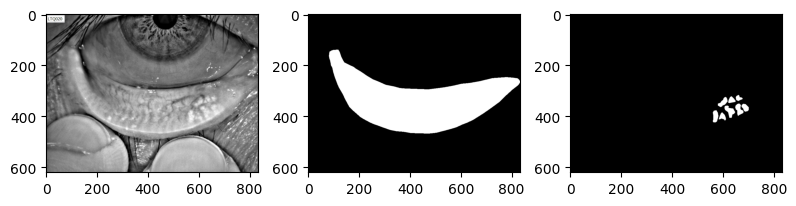

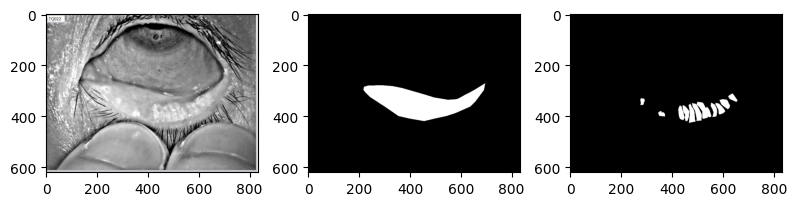

In [52]:
# show images
def show_images(img1, img2,img3):
    # 1 row and 2 columns
    fig = plt.figure(figsize=(8, 8))
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(img1)

    fig.add_subplot(1, 3, 2)
    plt.imshow(img2)
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(img3)

    fig.tight_layout(pad=1.0)

    plt.show()

# show images
show_images(xs_train[0],ys_train[0],zs_train[0])
show_images(xs_train[1],ys_train[1],zs_train[1])